In [3]:
# Imports
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
### Changeable Variables
# File Names
spec_file = 'cs-137_spectrum.csv'
xs_file = '/Users/briannaryan/Desktop/CEvNS/Detector Material Comparison/aluminum_xs_exp.csv'

# Source variables = 1g of Cs-137
Q = 1176
distance = 1    #m
source_flux = 3.7*10**10

# Detector Variables = 1 kg Zinc Superconductor in a cube
det_num = 1
det_mass = 1000    #grams
det_density = 2.7   #g/cm^3
det_amu = 26.981538 
A = 27

# Constants
N_A = 6.0221408*10**(23)  #atoms/mole

Text(0, 0.5, 'xs')

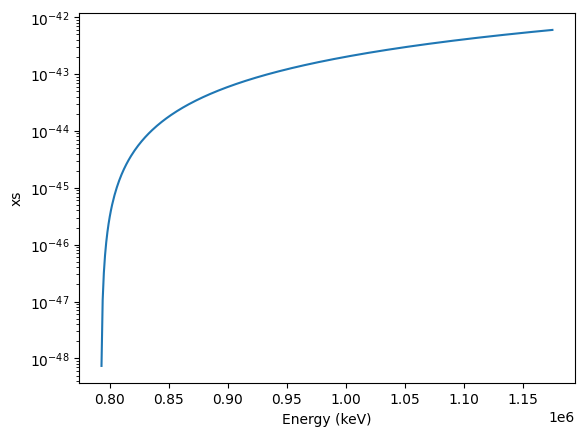

In [5]:
# Read XS csv file
energies = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0]))
        xs.append(float(row[1]))

index = energies.index(float(Q)*10**3)
energies_xs = energies[0:index]
xs = xs[0:index]

# Graph XS
plt.plot(energies_xs, xs)
plt.xlabel('Energy (keV)')
plt.yscale('log')
plt.ylabel('xs')

Text(0, 0.5, 'dN/dE')

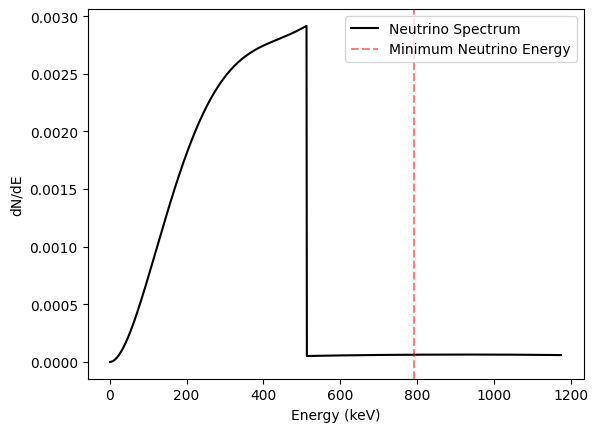

In [6]:
# Read Spectrum CSV File
energies_spec = []
counts = []

with open(spec_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_spec.append(float(row[0]))
        counts.append(float(row[1]))

# Graph Spectrum
plt.plot(energies_spec, counts, color='black', label = 'Neutrino Spectrum')
plt.axvline(x=energies_xs[0]*10**(-3), color='red', ls='dashed', alpha=0.5, label = 'Minimum Neutrino Energy')
plt.xlabel('Energy (keV)')
plt.legend()
plt.ylabel('dN/dE')

In [7]:
# Calculating the reaction rate as a function of energy
reaction_rate = []

for i in range(len(energies_xs)) :
    P=1
    R = source_flux*xs[i]*10**(-4)*N_A*det_mass*P/(A*4*math.pi*distance**2)
    reaction_rate.append(R*det_num)

In [8]:
kev = []
for e in energies_xs :
    kev.append(e*10**(-3))

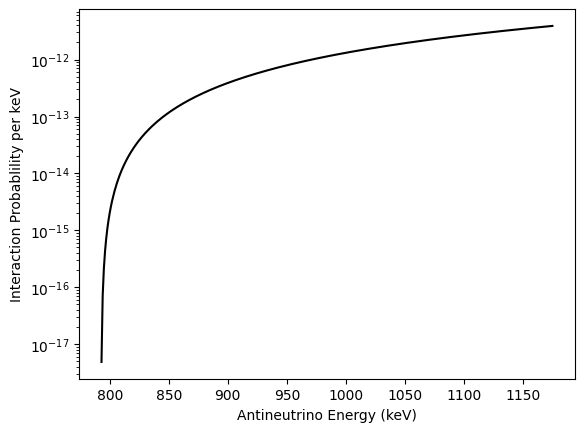

In [9]:
# Graphing reaction rate
plt.plot(kev, reaction_rate, color='black')
plt.xlabel('Antineutrino Energy (keV)')
plt.ylabel('Interaction Probablility per keV')
plt.yscale('log')

In [10]:
for i in range(len(counts), 0) :
    if energies_spec[i] not in energies:
        counts.pop(i)

rate_spec = []
for i in range(len(energies_xs)) :
    x = reaction_rate[i]*counts[i]
    t = 86400
    rate_spec.append(x*t)

Text(0, 0.5, 'Counts/keV/Day')

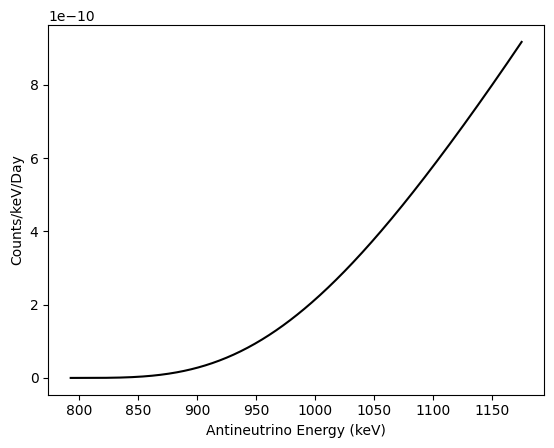

In [11]:
# Graphing reaction rate
plt.plot(kev, rate_spec, color='black')
plt.xlabel('Antineutrino Energy (keV)')
plt.ylabel('Counts/keV/Day')

In [12]:
print(sum(rate_spec))

1.0577701883435292e-07
